In [1]:
import os
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import h5py

In [2]:
dir = "../data"
data_files = os.listdir(dir)
data_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s]
data_files

['thread_scaling_8.h5',
 'thread_scaling_2.h5',
 'thread_scaling_16.h5',
 'thread_scaling_4.h5',
 'thread_scaling_1.h5']

In [3]:
h5_files = [h5py.File(dir + '/' + f) for f in data_files]
solns = [f["population"] for f in h5_files]

In [4]:
distances = np.zeros((len(solns), len(solns)), dtype="float")
for i in range(distances.shape[0]):
    for j in range(distances.shape[1]):
        sol1_vec = solns[i][()].reshape((solns[i].size, 1))
        sol2_vec = solns[j][()].reshape((solns[j].size, 1))
        distances[i, j] = la.norm(sol1_vec - sol2_vec) / solns[i].size

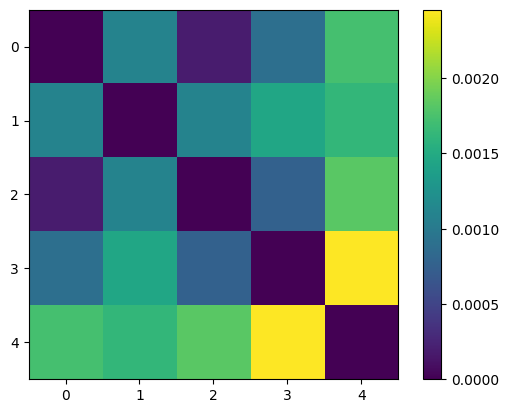

In [5]:
fig, ax = plt.subplots()
mappable = ax.imshow(distances)
plt.colorbar(mappable)